 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns_csv_path = Path("Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_return_csv_df = pd.read_csv(whale_returns_csv_path)
whale_return_csv_df.set_index(pd.to_datetime(whale_return_csv_df['Date'], infer_datetime_format = True), inplace = True)
whale_return_csv_df.drop(columns = ["Date"], inplace = True)
whale_return_csv_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_return_csv_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_return_csv_df.dropna(inplace = True)
whale_return_csv_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_returns_csv_path = Path("Resources/algo_returns.csv")
algo_returns_csv_df = pd.read_csv(algo_returns_csv_path)
algo_returns_csv_df.set_index(pd.to_datetime(algo_returns_csv_df['Date'], infer_datetime_format = True), inplace = True)
algo_returns_csv_df.drop(columns = ["Date"], inplace = True)
algo_returns_csv_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_csv_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_csv_df.dropna(inplace = True)
algo_returns_csv_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv_path = Path("Resources/sp_tsx_history.csv")
sp_tsx_history_csv_df = pd.read_csv(sp_tsx_history_csv_path)
sp_tsx_history_csv_df.set_index(pd.to_datetime(sp_tsx_history_csv_df['Date'], infer_datetime_format = True), inplace = True)
sp_tsx_history_csv_df.drop(columns = ["Date"], inplace = True)
sp_tsx_history_csv_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
print(sp_tsx_history_csv_df.dtypes)

# Fix Data Types
for col in sp_tsx_history_csv_df.columns[0:]:
    sp_tsx_history_csv_df[col] = pd.to_numeric(sp_tsx_history_csv_df[col].str.replace('[^-.0-9]', ''))

Close    object
dtype: object


C:\Users\rosha\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [11]:
# Calculate Daily Returns
sp_tsx_history_daily_returns = sp_tsx_history_csv_df.pct_change()
sp_tsx_history_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sp_tsx_history_csv_df.dropna(inplace = True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_csv_df.rename(columns={"Close" : "S&P TSX" }, inplace = True)
sp_tsx_history_daily_returns.rename(columns={"Close" : "S&P TSX" }, inplace = True)
sp_tsx_history_csv_df.head()

,S&P TSX
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
single_df = pd.concat(
                [whale_return_csv_df, algo_returns_csv_df, sp_tsx_history_daily_returns], axis="columns", join = "inner" 
            )
# single_df.drop(columns = ["Date"], inplace = True)
single_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of S&P TSX over the Last 7 Years'}, xlabel='Date'>

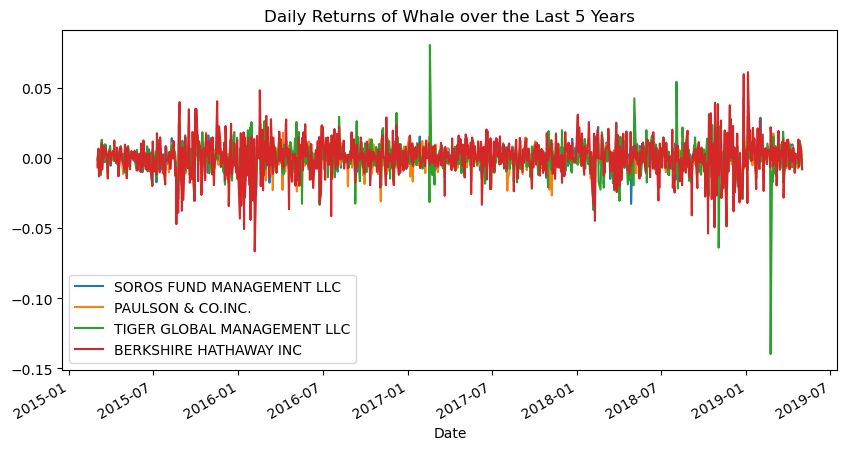

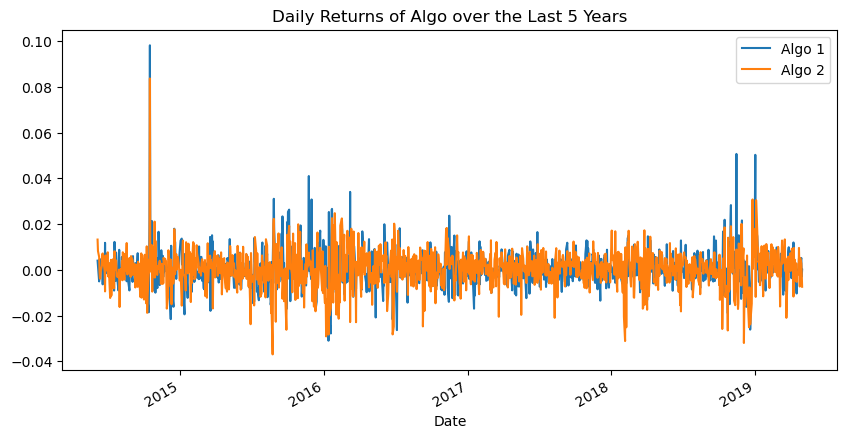

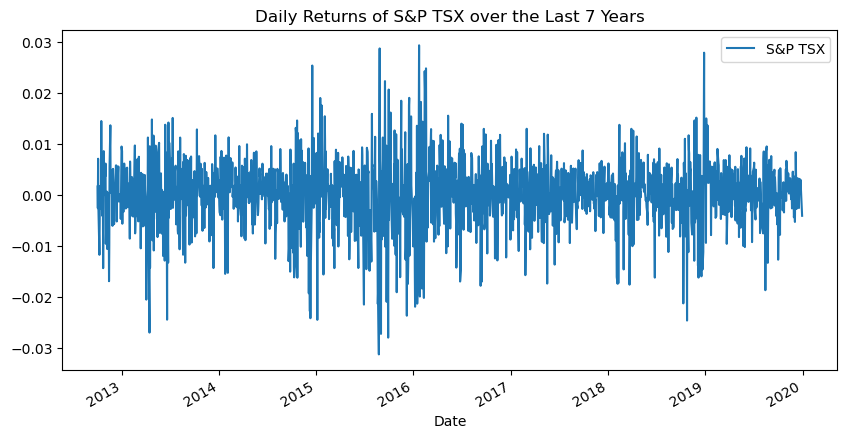

In [15]:
# Plot daily returns of all portfolios
whale_return_csv_df.plot(figsize=(10, 5), title="Daily Returns of Whale over the Last 5 Years")
algo_returns_csv_df.plot(figsize=(10, 5), title="Daily Returns of Algo over the Last 5 Years")
sp_tsx_history_daily_returns.plot(figsize=(10, 5), title="Daily Returns of S&P TSX over the Last 7 Years")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of S&P TSX over the Last 7 Years'}, xlabel='Date'>

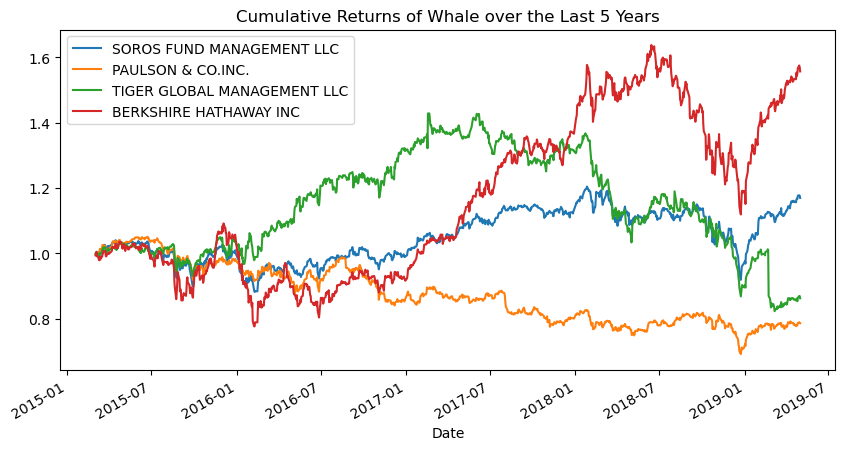

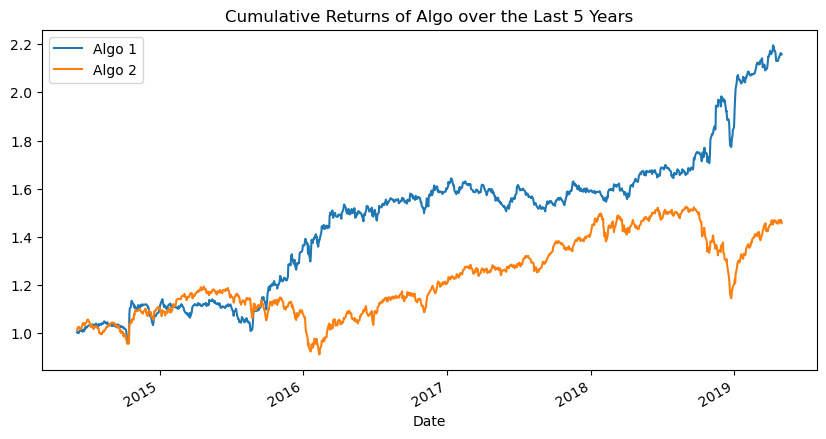

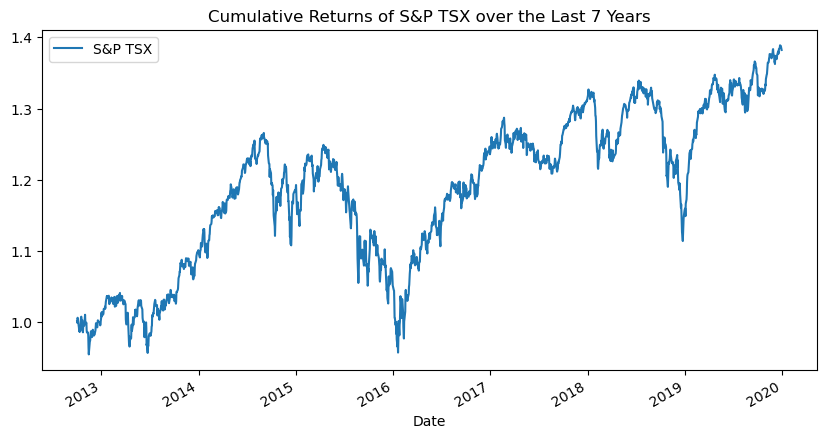

In [16]:
# Calculate cumulative returns of all portfolios
whale_cumulative_returns = (1 + whale_return_csv_df).cumprod()
algo_cumulative_returns = (1 + algo_returns_csv_df).cumprod()
sp_tsx_cumulative_returns = (1 + sp_tsx_history_daily_returns).cumprod()
# Plot cumulative returns
whale_cumulative_returns.plot(figsize=(10, 5), title="Cumulative Returns of Whale over the Last 5 Years")
algo_cumulative_returns.plot(figsize=(10, 5), title="Cumulative Returns of Algo over the Last 5 Years")
sp_tsx_cumulative_returns.plot(figsize=(10, 5), title="Cumulative Returns of S&P TSX over the Last 7 Years")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

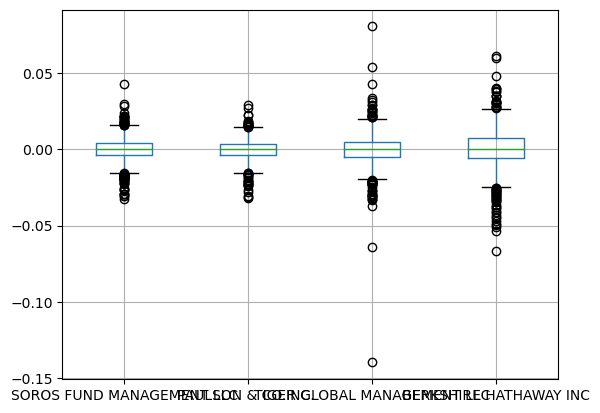

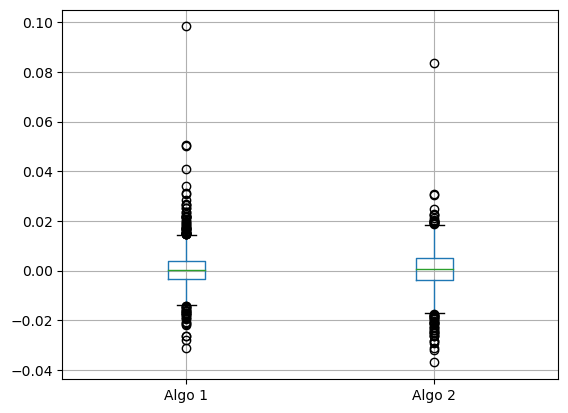

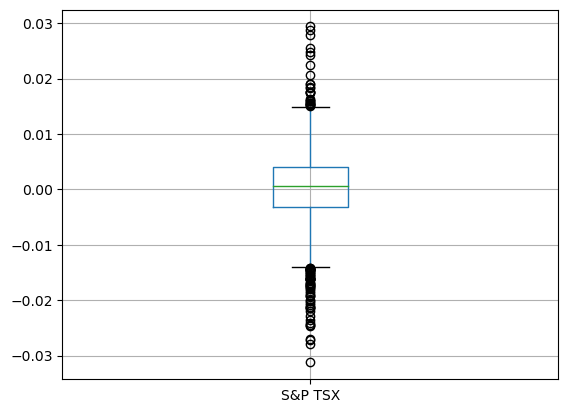

In [17]:
# Box plot to visually show risk
plt.figure()
whale_return_csv_df.boxplot()
plt.figure()
algo_returns_csv_df.boxplot()
plt.figure()
sp_tsx_history_daily_returns.boxplot()

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
whale_return_csv_df_std = whale_cumulative_returns.std()
algo_returns_csv_df_std = algo_returns_csv_df.std()

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = sp_tsx_history_daily_returns.std()
# Determine which portfolios are riskier than the S&P TSX 60

print(f'Standard deviation of portfolio Whale:\n---------------------------------------------\n{whale_return_csv_df_std}')
print(f'Standard deviation of portfolio Algo:\n---------------------------------------------\n{algo_returns_csv_df_std}')
print(f'Standard deviation of portfolio S&P TSX:\n---------------------------------------------\n{sp_tsx_std}')


Standard deviation of portfolio Whale:
---------------------------------------------
SOROS FUND MANAGEMENT LLC      0.073730
PAULSON & CO.INC.              0.088385
TIGER GLOBAL MANAGEMENT LLC    0.151043
BERKSHIRE HATHAWAY INC         0.242778
dtype: float64
Standard deviation of portfolio Algo:
---------------------------------------------
Algo 1    0.007988
Algo 2    0.008466
dtype: float64
Standard deviation of portfolio S&P TSX:
---------------------------------------------
S&P TSX    0.006637
dtype: float64


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
volatility = single_df.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

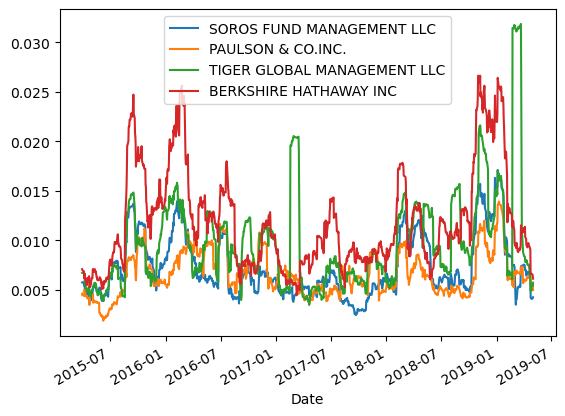

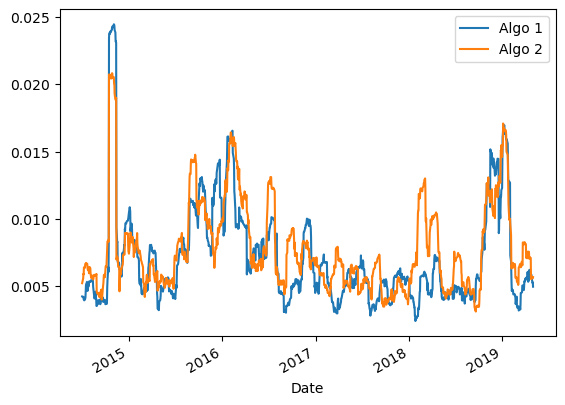

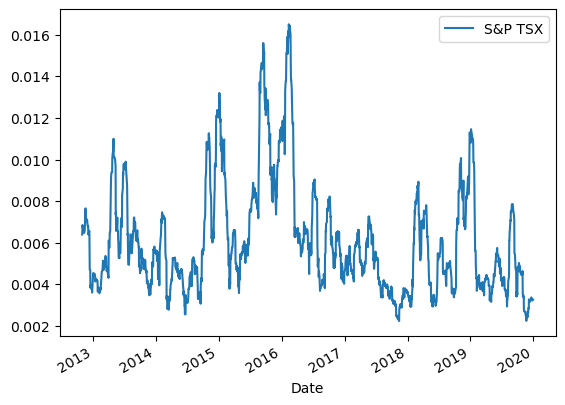

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_return_csv_df_rolling_std = whale_return_csv_df.rolling(window=21).std()
algo_returns_csv_df_rolling_std = algo_returns_csv_df.rolling(window=21).std()
sp_tsx_rolling_std = sp_tsx_history_daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
whale_return_csv_df_rolling_std.plot()
algo_returns_csv_df_rolling_std.plot()
sp_tsx_rolling_std.plot()

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
S&P TSX                                       0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236   
Algo 2         

<AxesSubplot:>

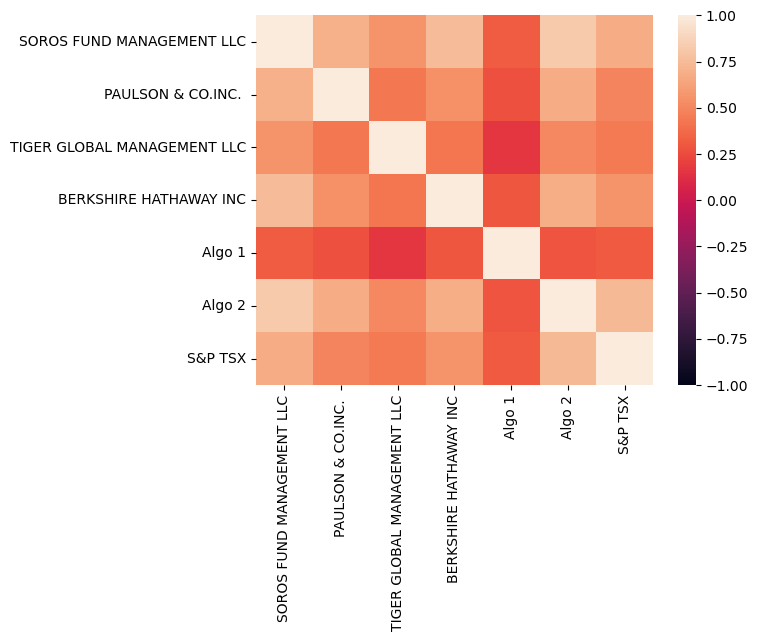

In [22]:
# Calculate the correlation
price_correlation = single_df.corr()
# Display de correlation matrix
print(price_correlation)
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

S&P TSX variance: 4.9479515915131015e-05


<AxesSubplot:title={'center':'Rolling 30-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

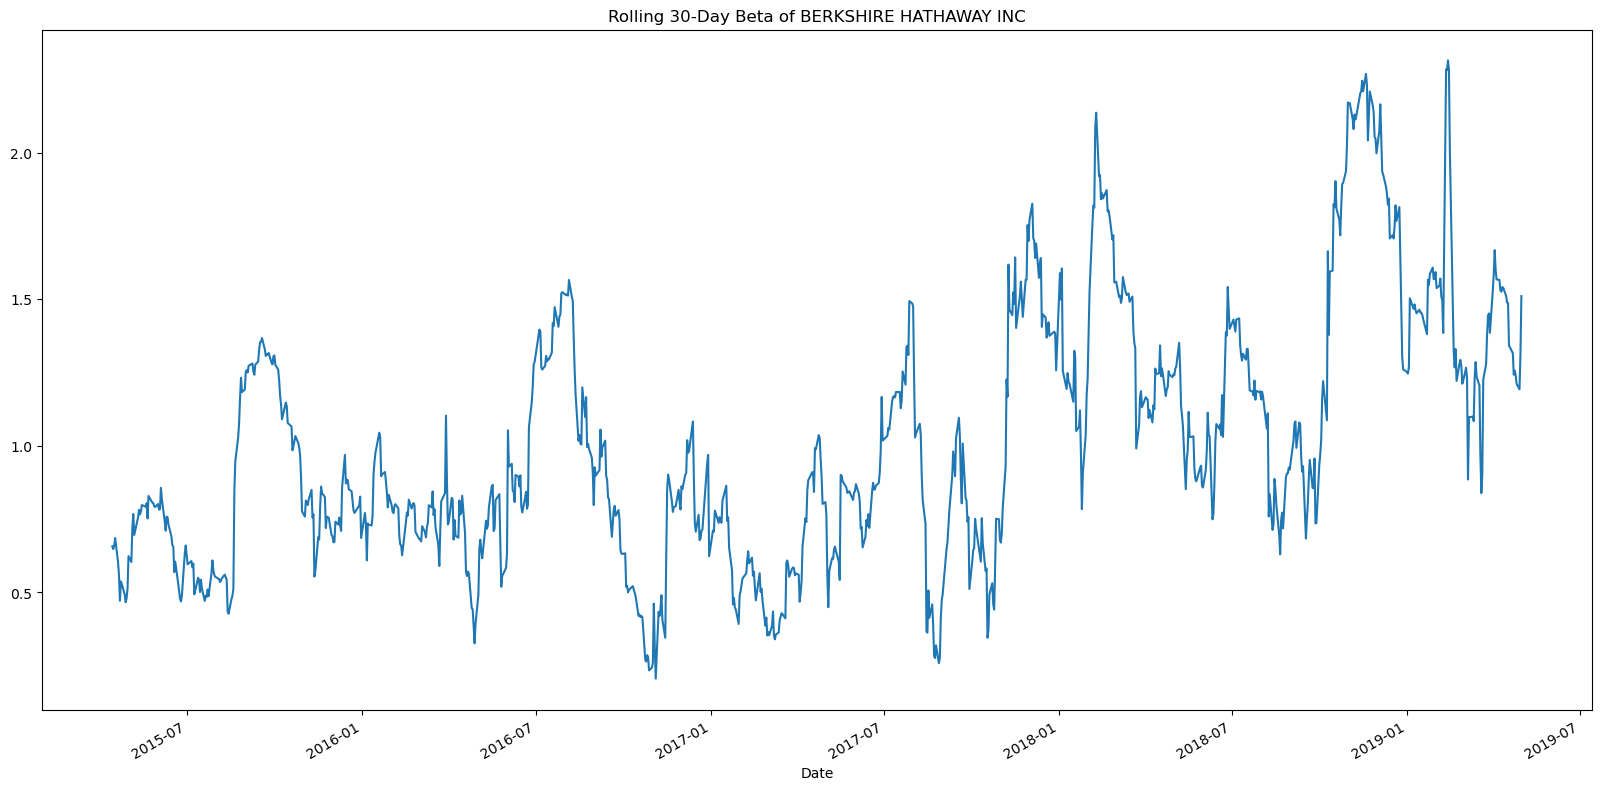

In [23]:
# Calculate covariance of a single portfolio
soros_covariance = single_df['SOROS FUND MANAGEMENT LLC'].cov(single_df['S&P TSX'])
paulson_covariance = single_df['PAULSON & CO.INC. '].cov(single_df['S&P TSX'])
tiger_covariance = single_df['TIGER GLOBAL MANAGEMENT LLC'].cov(single_df['S&P TSX'])
berkshire_covariance = single_df['BERKSHIRE HATHAWAY INC'].cov(single_df['S&P TSX'])
algo_1_covariance = single_df['Algo 1'].cov(single_df['S&P TSX'])
algo_2_covariance = single_df['Algo 2'].cov(single_df['S&P TSX'])
# Calculate variance of S&P TSX
variance = single_df["S&P TSX"].var()
print(f"S&P TSX variance: {variance}")

# Computing beta
soros_beta = soros_covariance / variance
paulson_beta = paulson_covariance / variance
tiger_beta = tiger_covariance / variance
berkshire_beta = berkshire_covariance / variance
algo_1_beta = algo_1_covariance / variance
algo_2_beta = algo_2_covariance / variance

# Plot beta trend
rolling_covariance = single_df['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(single_df['S&P TSX'])
rolling_variance = single_df['S&P TSX'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Rolling 30-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

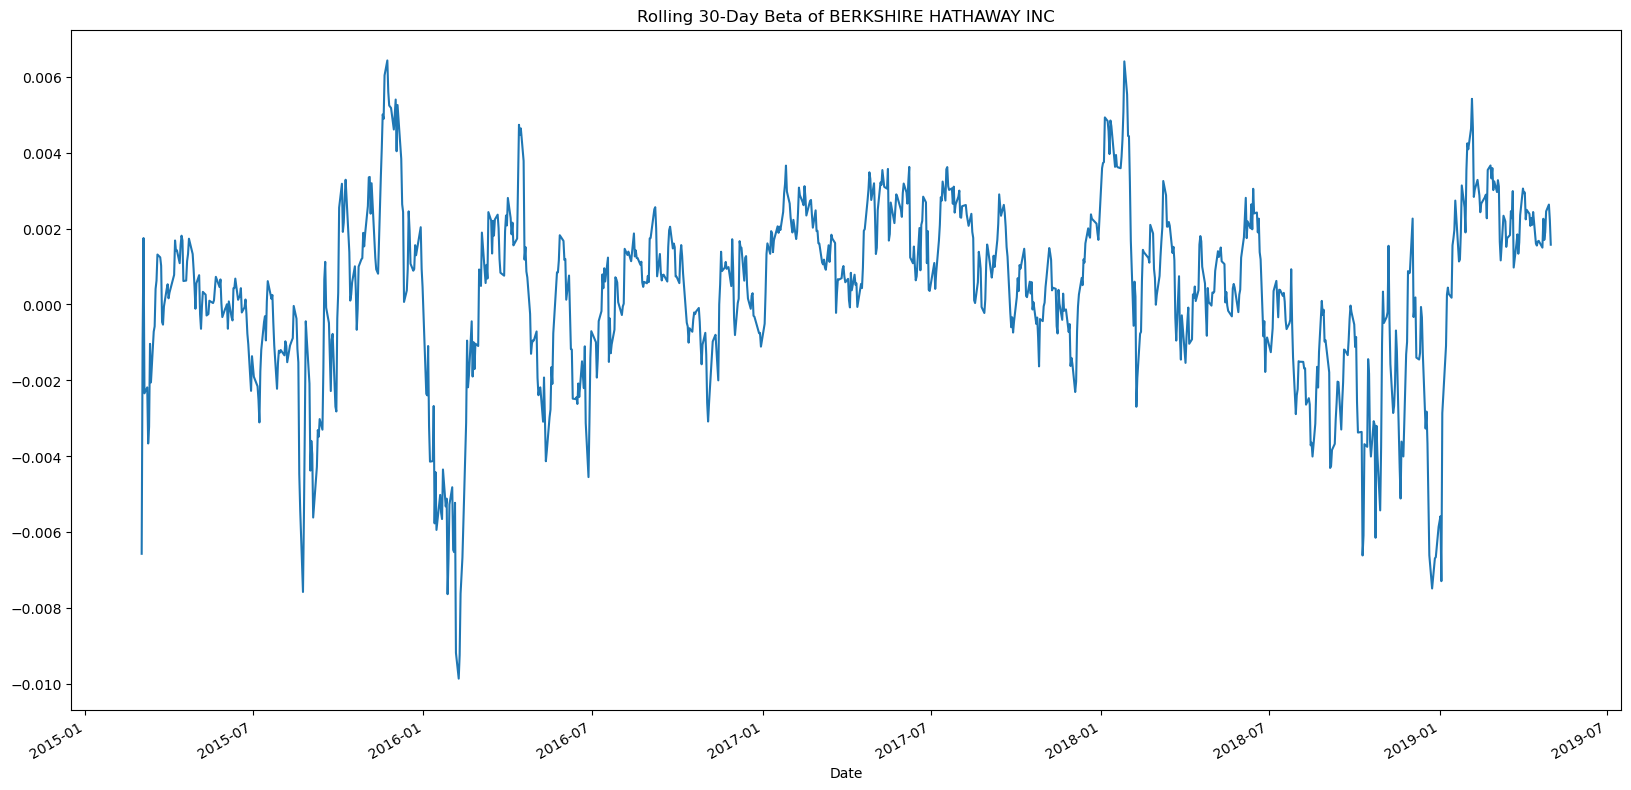

In [24]:
# Use `ewm` to calculate the rolling window
ewma = single_df['BERKSHIRE HATHAWAY INC'].ewm(span=30).mean()
ewma.plot(figsize=(20, 10), title='Rolling 30-Day Beta of BERKSHIRE HATHAWAY INC')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (single_df.mean() * 252) / (single_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:>

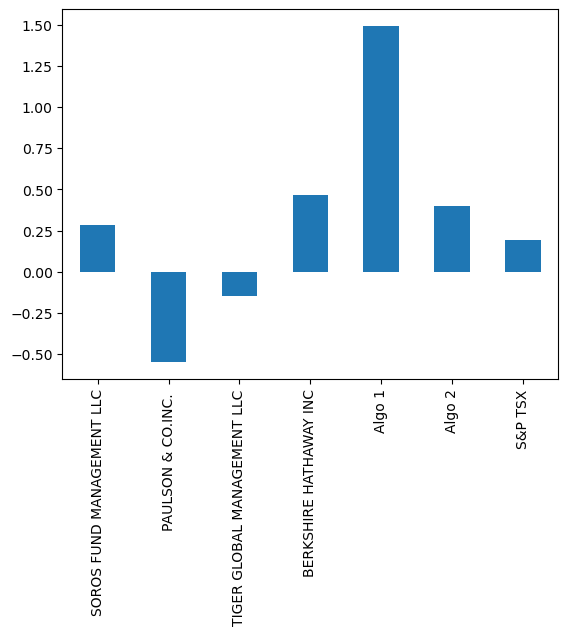

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
Based on the bar graph Alog 1 and Algo 2 both have higer sharpe ratio than that og S&P TSX and all the whales (except for Alog 2 which is less that Berkshire) Thus from this we can conclude that the algorithmic strategies outperfoms both the market (S&P TSX) and whales.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock - Apple
appl_csv_path = Path("Resources/my_protfolio/appl.csv")
appl_df = pd.read_csv(appl_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
appl_df.index = appl_df.index.normalize()
appl_df.head()

,Close
Date,
2015-01-02,27.33
2015-01-05,26.56
2015-01-06,26.57
2015-01-07,26.94
2015-01-08,27.97


In [28]:
# Reading data from 2nd stock - DCC
dcc_csv_path = Path("Resources/my_protfolio/dcc.csv")
dcc_df = pd.read_csv(dcc_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
dcc_df.index = dcc_df.index.normalize()
dcc_df.head()

,Close
Date,
2015-01-02,0.14
2015-01-05,0.14
2015-01-06,0.14
2015-01-08,0.14
2015-01-09,0.14


In [29]:
# Reading data from 3rd stock - Qantas
qantas_csv_path = Path("Resources/my_protfolio/qantas.csv")
qantas_df = pd.read_csv(qantas_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
qantas_df.index = qantas_df.index.normalize()
qantas_df.head()

,Close
Date,
2015-01-02,2.58
2015-01-05,2.66
2015-01-06,2.78
2015-01-07,2.73
2015-01-08,2.71


In [30]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([appl_df, dcc_df, qantas_df], axis='columns', join='inner')

In [31]:
# Reset Date index
combined_df.sort_index(inplace=True)
combined_df.head()

,Close,Close,Close
Date,,,
2015-01-02,27.33,0.14,2.58
2015-01-05,26.56,0.14,2.66
2015-01-06,26.57,0.14,2.78
2015-01-08,27.97,0.14,2.71
2015-01-09,28.00,0.14,2.66


In [32]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ['APPLE', 'DCC', 'QANTAS' ]
combined_df.head()

,APPLE,DCC,QANTAS
Date,,,
2015-01-02,27.33,0.14,2.58
2015-01-05,26.56,0.14,2.66
2015-01-06,26.57,0.14,2.78
2015-01-08,27.97,0.14,2.71
2015-01-09,28.00,0.14,2.66


In [33]:
# Calculate daily returns
daily_returns = combined_df.pct_change()
# Drop NAs
daily_returns.dropna(inplace = True)
# Display sample data
daily_returns.head()

,APPLE,DCC,QANTAS
Date,,,
2015-01-05,-0.028174,0.0,0.031008
2015-01-06,0.000377,0.0,0.045113
2015-01-08,0.052691,0.0,-0.025180
2015-01-09,0.001073,0.0,-0.018450
2015-01-12,-0.024643,0.0,-0.026316


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2015-01-05    0.000945
2015-01-06    0.015163
2015-01-08    0.009170
2015-01-09   -0.005793
2015-01-12   -0.016986
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([ daily_returns , portfolio_returns], axis='columns', join='inner')
joined_df.head()
joined_df.rename(columns={0: 'PROTFOLIO RETURN'}, inplace=True)

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.dropna(inplace = True)
joined_df.head()

,APPLE,DCC,QANTAS,PROTFOLIO RETURN
Date,,,,
2015-01-05,-0.028174,0.0,0.031008,0.000945
2015-01-06,0.000377,0.0,0.045113,0.015163
2015-01-08,0.052691,0.0,-0.025180,0.009170
2015-01-09,0.001073,0.0,-0.018450,-0.005793
2015-01-12,-0.024643,0.0,-0.026316,-0.016986


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
volatility = joined_df.std() * np.sqrt(252)
volatility

APPLE               0.303851
DCC                 1.694081
QANTAS              0.361088
PROTFOLIO RETURN    0.602335
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

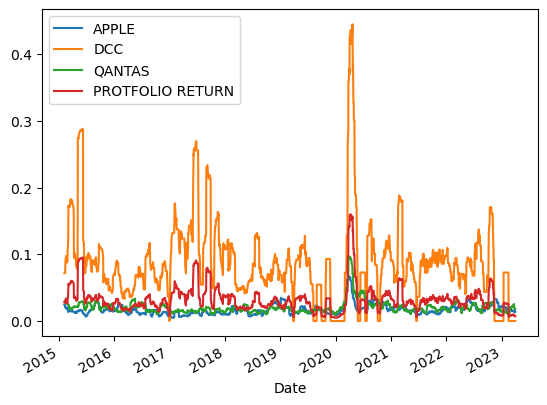

In [38]:
# Calculate rolling standard deviation
rolling_standard_deviation = joined_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_standard_deviation.plot()

### Calculate and plot the correlation

<AxesSubplot:>

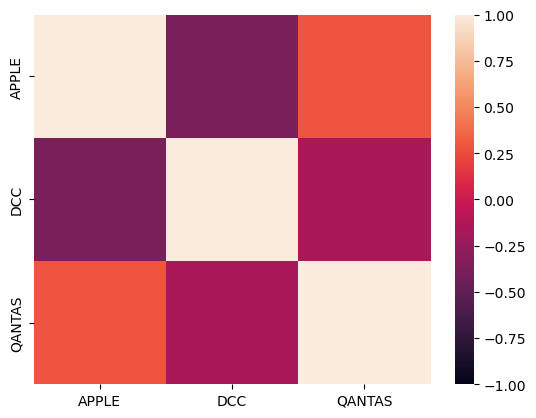

In [39]:
# Calculate and plot the correlation
price_correlation = combined_df.corr()
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

               APPLE  DCC    QANTAS  PROTFOLIO RETURN   S&P TSX
Date                                                           
2019-12-20 -0.002143  0.0 -0.006757         -0.002966  0.003188
2019-12-23  0.016318  0.0  0.005442          0.007254  0.000600
2019-12-24  0.000986  0.0 -0.008119         -0.002378  0.003003
2019-12-27  0.019417  0.0  0.001364          0.006927 -0.000695
2019-12-30  0.005935  0.0 -0.002725          0.001070 -0.004057


<AxesSubplot:title={'center':'Rolling 60-Day Beta of My ProtfolioMSFT'}, xlabel='Date'>

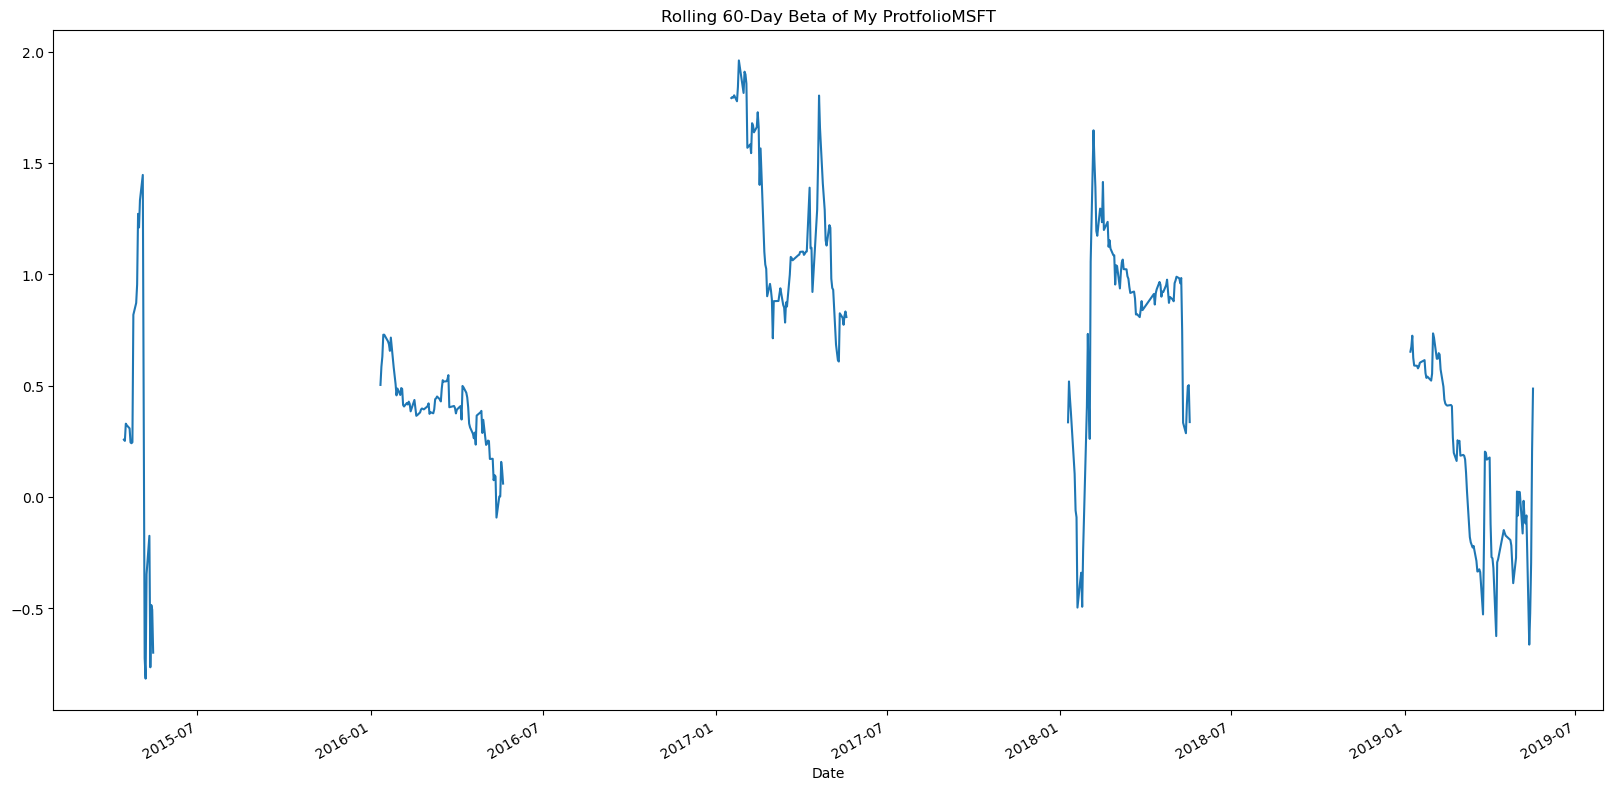

In [40]:
# Calculate and plot Beta
my_protfolio_combined_with_SPTSX = pd.concat([joined_df, sp_tsx_history_daily_returns ], axis='columns', join='inner')
my_protfolio_combined_with_SPTSX.dropna(inplace=True)
my_protfolio_combined_with_SPTSX.sort_index(inplace=True)
print(my_protfolio_combined_with_SPTSX.tail())

rolling_covariance = joined_df['PROTFOLIO RETURN'].rolling(window=60).cov(my_protfolio_combined_with_SPTSX['S&P TSX'])
rolling_variance = my_protfolio_combined_with_SPTSX['S&P TSX'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My ProtfolioMSFT')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (my_protfolio_combined_with_SPTSX.mean() * 252) / (my_protfolio_combined_with_SPTSX.std() * np.sqrt(252))
sharpe_ratios

APPLE               0.946784
DCC                 0.484643
QANTAS              0.894100
PROTFOLIO RETURN    0.768577
S&P TSX             0.245114
dtype: float64

<AxesSubplot:>

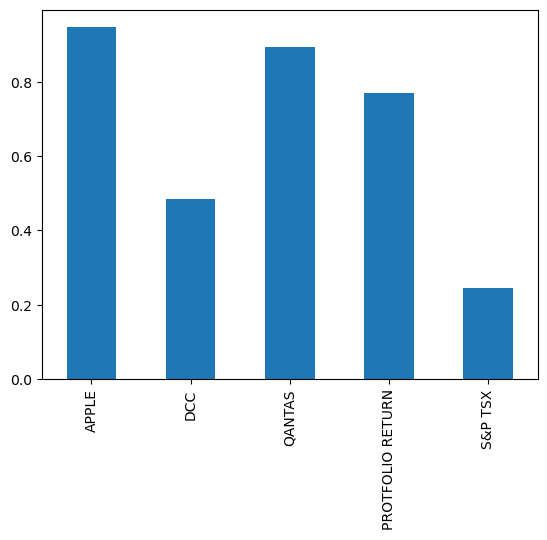

In [42]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### How does your portfolio do?

The graph above shows that my protofolio is doing really well except for 'DCC' compare to S&P TSX.